In [2]:
import tensorflow as tf;
import numpy as np;
import pandas as pd;
import os;
import matplotlib.image as mpimg;
from keras.preprocessing.image import ImageDataGenerator;
import matplotlib.pyplot as plt;

In [3]:
train_data=pd.read_csv("Human Action Recognition/Training_set.csv")
train_data=train_data.sample(frac=1,axis=0)
train_data.head()
test_data=pd.read_csv("Human Action Recognition/Testing_set.csv")

In [4]:
print("Different types of human action:\n")
train_data["label"].value_counts()

Different types of human action:



eating                840
cycling               840
running               840
calling               840
sleeping              840
clapping              840
texting               840
drinking              840
fighting              840
laughing              840
dancing               840
sitting               840
listening_to_music    840
using_laptop          840
hugging               840
Name: label, dtype: int64

In [33]:
data=pd.read_csv("./Human Action Recognition/Training_set.csv")
data.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [36]:
classes=data["label"].unique()
len(classes)

15

In [5]:
train_images=[]
train_labels=[]
train_folder="Human Action Recognition/train/"
for img_file in os.listdir(train_folder):
    label=train_data[train_data["filename"]==img_file]['label'].values
    if len(label)==0:
        continue
    label=label[0]
    train_labels.append(label)
    train_images.append(mpimg.imread(os.path.join(train_folder,img_file)))
    
        

In [6]:
test_images=[]
test_labels=[]
test_folder="Human Action Recognition/test/"
for img_file in os.listdir(test_folder):
    label=train_data[train_data["filename"]==img_file]['label'].values
    if len(label)==0:
        continue
    test_labels.append(label)
    test_images.append(mpimg.imread(os.path.join(test_folder,img_file)))
    

  *************************** FEATUREWISE CENTER ************************************

C:\Users\rajashekar V.T\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(-0.5, 317.5, 158.5, -0.5)

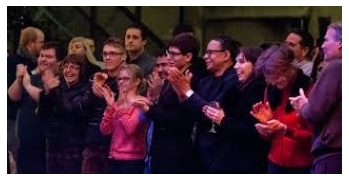

In [17]:
datagen_center=ImageDataGenerator(featurewise_center=True)
aug_iter=datagen_center.flow(np.array([train_images[14]]),batch_size=1)
image=next(aug_iter)[0].astype('uint8')
plt.imshow(image)
plt.axis("off")

 ****************************************** SAMPLEWISE CENTER ***************************************

(-0.5, 274.5, 182.5, -0.5)

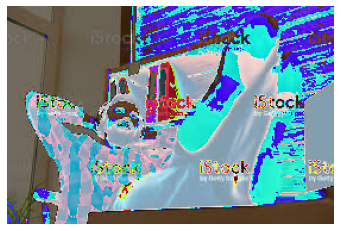

In [14]:
datagen_center1=ImageDataGenerator(samplewise_center=True)
aug_iter=datagen_center1.flow(np.array([train_images[13]]),batch_size=1)
img=next(aug_iter)[0].astype('uint8')
plt.imshow(img)
plt.axis("off")

 ******************************** FEATUREWISE STANDARD NORMALISATION *************************************

C:\Users\rajashekar V.T\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1297: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


(-0.5, 274.5, 182.5, -0.5)

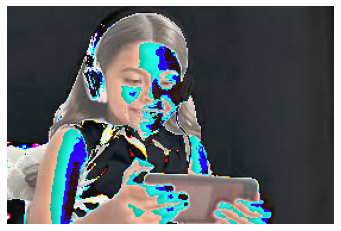

In [9]:
datagen_normalize=ImageDataGenerator(featurewise_std_normalization=True)
aug_iter=datagen_center.flow(np.array([train_images[10]]),batch_size=1)
image=next(aug_iter)[0].astype('uint8')
plt.imshow(image)
plt.axis("off")

In [10]:
datagen_center

C:\Users\rajashekar V.T\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1285: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\rajashekar V.T\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\rajashekar V.T\AppData\Roaming\Python\Python310\site-packages\keras\preprocessing\image.py:1682: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(-0.5, 274.5, 182.5, -0.5)

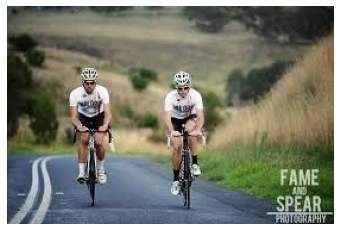

In [25]:
datagen_zca=ImageDataGenerator(zca_whitening=True,zca_epsilon=0.1)
aug_iter=datagen_zca.flow(np.array([train_images[15]]),batch_size=1)
img=next(aug_iter)[0].astype('uint8')
plt.imshow(img)
plt.axis("off")



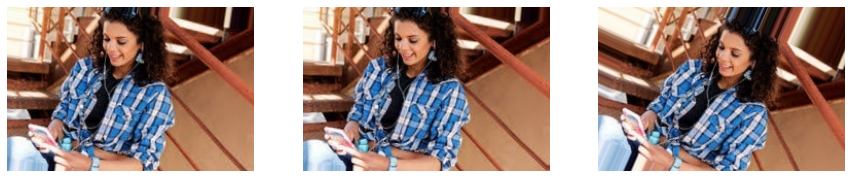

In [12]:
datagen_rotation = ImageDataGenerator(rotation_range=30, fill_mode='nearest')
aug_iter = datagen_rotation.flow(np.array([train_images[0]]), batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
# generate batch of images
for i in range(3):
    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')
    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')
    

In [29]:
tf.random.set_seed(42)
data_generator=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,rotation_range=0.2,brightness_range=[0.8,1.2],
                                  fill_mode='nearest',horizontal_flip=True,vertical_flip=True,width_shift_range=0.2,
                                  height_shift_range=0.2,validation_split=0.2)
train_datagen=data_generator.flow_from_dataframe(dataframe=train_data,directory=train_folder,
                                                 target_size=(224,224),batch_size=32,x_col='filename',y_col='label',class_mode="categorical")
test_datagen=data_generator.flow_from_dataframe(dataframe=test_data,directory=test_folder,
                                                target_size=(224,224),batch_size=32,class_mode=None,x_col="filename",y_col=None)

Found 12600 validated image filenames belonging to 15 classes.
Found 5400 validated image filenames.


In [52]:
inputs=tf.keras.layers.Input(shape=(224,224,3))
base=tf.keras.applications.EfficientNetB0(include_top=False)
base.trainable=True
x=base(inputs,training=True)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
outputs=tf.keras.layers.Dense(15,activation="softmax")(x)
model=tf.keras.Model(inputs,outputs)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [54]:
model.fit(train_datagen,epochs=5,steps_per_epoch=len(train_datagen),validation_data=test_datagen,validation_steps=len(test_datagen))

Epoch 1/5
394/394 [==============================] - 166s 422ms/step - loss: 1.1623 - accuracy: 0.6306 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
394/394 [==============================] - 203s 516ms/step - loss: 1.0084 - accuracy: 0.6789 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
394/394 [==============================] - 228s 578ms/step - loss: 0.9085 - accuracy: 0.7094 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
394/394 [==============================] - 211s 536ms/step - loss: 0.8287 - accuracy: 0.7384 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
394/394 [==============================] - 230s 583ms/step - loss: 0.7490 - accuracy: 0.7607 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [56]:
from keras import mixed_precision;
mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3070 Laptop GPU, compute capability 8.6


In [55]:
def load_and_prep(filename):
    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img)
    img=tf.image.resize(img,size=[224,224])
    img=img/255.
    return img

In [58]:
def pred_and_plot(model,filename,class_name=classes):
    img=load_and_prep(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    if len(pred[0])>1:
        pred_class=classes[tf.argmax(pred[0])]
    else:
        pred_class=classes[int(tf.round(pred[0]))]
    plt.imshow(img)
    plt.title(f"Prediction:{pred_class}")
    plt.axis("off")

1/1 [==============================] - 0s 29ms/step


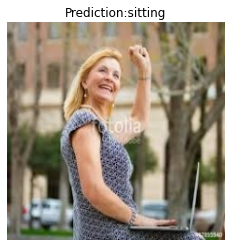

In [63]:
img=pred_and_plot(model,"./Human Action Recognition/train/Image_5.jpg")

1/1 [==============================] - 0s 30ms/step


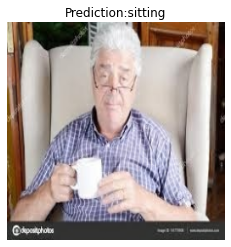

In [64]:
img2=pred_and_plot(model,"./Human Action Recognition/train/Image_7.jpg")